In [1]:
 import pandas as pd
import numpy as np
import scipy
import fnmatch

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.patches as patches

from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics.pairwise import pairwise_distances

import os
import re
import numpy.linalg
# import ot

import networkx as nx
import pickle
import random
from copy import deepcopy

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

%matplotlib inline
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

## Load Data

In [2]:
# with open('./pairwise_dist.pkl', 'rb') as fp:
#     pairwise = pickle.load(fp)
with open('./cxs_list.pkl', 'rb') as fp:
    cxs_list = pickle.load(fp)
with open('./hist_2d.pkl', 'rb') as fp:
    hist_2d = pickle.load(fp)
    
# del hist_2d[259]
# del cxs_list[259]

250000

In [3]:
csd_mof = pd.read_excel('./CSD_MOFs.xlsx', index_col=0)
po_size_keep = pd.read_excel('./../Properties.xlsx',sheet_name='ListOfCxp',header=None)
po_size = pd.read_excel('./../Properties.xlsx',sheet_name='Selected', index_col=0 )

In [4]:
po_size_keep
len(cxs_list)

508

In [75]:
# len(cxs_list)
# csd_mof.columns.tolist()[6]
# po_size.columns.tolist()[7]

# po_size_keep
# cxs_list

508

## ISOMAP and pickle result

In [5]:
manilern610 = manifold.Isomap(n_neighbors=6,n_components=3,
#                               neighbors_algorithm='kd_tree',
                             )
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld610 = manilern610.fit_transform(hist_2d)

In [4]:
manilern810 = manifold.Isomap(n_neighbors=8,n_components=10,neighbors_algorithm='kd_tree')
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld810 = manilern810.fit_transform(hist_2d)

n_bytes = 2**31
max_bytes = 2**31 - 1
file_path = './mani_mdls/mani_mdl810_final.pkl'
bytes_out = pickle.dumps(manilern810)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])

In [5]:
manilern610 = manifold.Isomap(n_neighbors=6,n_components=10,neighbors_algorithm='kd_tree')
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld610 = manilern610.fit_transform(hist_2d)

n_bytes = 2**31
max_bytes = 2**31 - 1
file_path = './mani_mdls/mani_mdl610_final.pkl'
bytes_out = pickle.dumps(manilern610)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])

In [6]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

## 3D scatter plot for all of the 508 MOF's, and movies

In [27]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
fig1 = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1 = fig1.add_axes([0,0,.8,1], projection='3d')
ax1cb = fig1.add_axes([.81,0.2,.05,.6])

# ax1.w_zaxis.line.set_lw(0.)
# ax1.w_zaxis.set_pane_color((1,1,1,0))
# # ax1.w_zaxis.grid(False)
# # ax1.set_zticks([])
# ax1.set_zticklabels([])
# for t in ax1.zaxis.get_major_ticks():
#     t.label.set_fontsize(10)
#     t.tick1line.set_alpha(0)
cpd_c = 0

ax1.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
ax1.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508', 
           transform=ax1.transAxes)
ax1.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/g)' ) 
cb1 = mpl.colorbar.ColorbarBase(ax1cb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1.set_label('Accessible Surface Area (m$^2$/g)')
# ax1.view_init(20,60)
fig1.tight_layout()
fig1.savefig('./figs_final/iso508_nb6_g', dpi=400, bbox_inches='tight')
fig1.savefig('./figs_final/iso508_nb6_g.pdf', bbox_inches='tight')

In [26]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
    clrr.append(csd_mof.loc[cpdn][6]) # cm^3
#     clrr.append(csd_mof.loc[cpdn][7]) # g
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
fig1 = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1 = fig1.add_axes([0,0,.8,1], projection='3d')
ax1cb = fig1.add_axes([.81,0.2,.05,.6])

# ax1.w_zaxis.line.set_lw(0.)
# ax1.w_zaxis.set_pane_color((1,1,1,0))
# # ax1.w_zaxis.grid(False)
# # ax1.set_zticks([])
# ax1.set_zticklabels([])
# for t in ax1.zaxis.get_major_ticks():
#     t.label.set_fontsize(10)
#     t.tick1line.set_alpha(0)
cpd_c = 0

# ax1.scatter(*prj_unfld810.T[0:3], c=clrmp(clrnorm(clrr)))
ax1.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
ax1.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508', 
           transform=ax1.transAxes)
ax1.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/cm$^3$)' ) 
cb1 = mpl.colorbar.ColorbarBase(ax1cb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1.set_label('Accessible Surface Area (m$^2$/cm$^3$)')
# ax1.view_init(20,60)
fig1.tight_layout()
fig1.savefig('./figs_final/iso508_nb6_cm3', dpi=400, bbox_inches='tight')
fig1.savefig('./figs_final/iso508_nb6_cm3.pdf', bbox_inches='tight')

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6g_alt0.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6g_alt0.mp4


100%|█████████▉| 500/501 [00:56<00:00,  8.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6g_alt0.mp4 

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6g_alt20.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6g_alt20.mp4


100%|█████████▉| 500/501 [00:51<00:00,  9.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6g_alt20.mp4 

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6g_alt45.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6g_alt45.mp4


100%|█████████▉| 500/501 [00:53<00:00,  9.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6g_alt45.mp4 



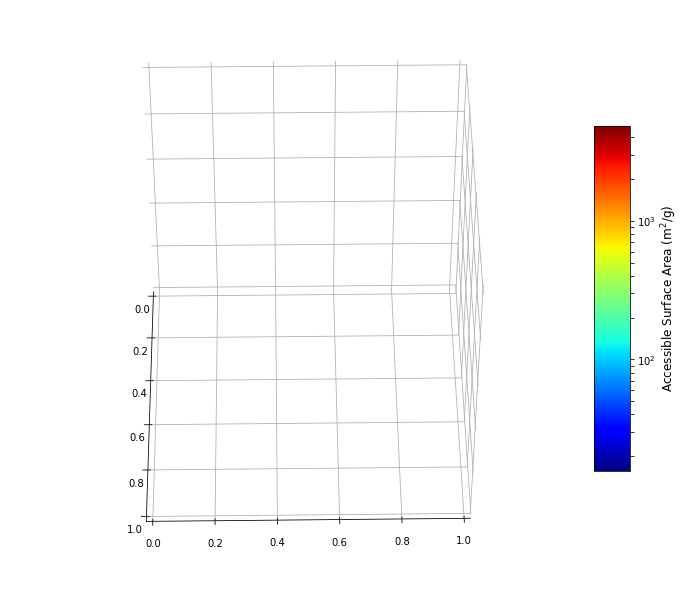

In [14]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

fig1m = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1m = fig1m.add_axes([0,0,.8,1], projection='3d')
ax1mcb = fig1m.add_axes([.81,0.2,.05,.6])

ax1m.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1m.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1m.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax1m.w_zaxis.line.set_lw(0.)
ax1m.w_zaxis.set_pane_color((1,1,1,0))

ax1m.set_zticklabels([])
for tk in ax1m.zaxis.get_major_ticks():
    tk.label.set_fontsize(10)
    tk.tick1line.set_alpha(0)

cpd_c = 0


ax1m.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/g)' ) 
cb1m = mpl.colorbar.ColorbarBase(ax1mcb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1m.set_label('Accessible Surface Area (m$^2$/g)', fontsize=12)

# ax1.view_init(30,0)

duration = 10
for alt in [0, 20, 45]:
# for alt in [20]:
    ax1m.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
    ax1m.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508\nAltitude = '+ str(alt)+'$^\circ$', 
           transform=ax1m.transAxes, )
    def make_frame(t:float):
        ax1m.view_init(alt, t/duration * 360)
        fig1m.tight_layout()
        return mplfig_to_npimage(fig1m)
    animation = VideoClip(make_frame, duration=duration)
    animation.write_videofile('./figs_final/isomv508_nb6g_alt'+str(alt)+'.mp4', fps=50)
    ax1m.clear()
    ax1m.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1m.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1m.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax1m.w_zaxis.line.set_lw(0.)
    ax1m.w_zaxis.set_pane_color((1,1,1,0))

    ax1m.set_zticklabels([])
    for tk in ax1m.zaxis.get_major_ticks():
        tk.label.set_fontsize(10)
        tk.tick1line.set_alpha(0)
#     animation.ipython_display(fps=20, loop=True, autoplay=True)

In [15]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
    clrr.append(csd_mof.loc[cpdn][6])
#     clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

fig1m = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1m = fig1m.add_axes([0,0,.8,1], projection='3d')
ax1mcb = fig1m.add_axes([.81,0.2,.05,.6])

ax1m.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1m.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1m.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax1m.w_zaxis.line.set_lw(0.)
ax1m.w_zaxis.set_pane_color((1,1,1,0))

ax1m.set_zticklabels([])
for tk in ax1m.zaxis.get_major_ticks():
    tk.label.set_fontsize(10)
    tk.tick1line.set_alpha(0)

cpd_c = 0


ax1m.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/cm$^3$)' ) 
cb1m = mpl.colorbar.ColorbarBase(ax1mcb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1m.set_label('Accessible Surface Area (m$^2$/cm$^3$)', fontsize=12)

# ax1.view_init(30,0)

duration = 10
for alt in [0, 20, 45]:
# for alt in [20]:
    ax1m.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
    ax1m.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508\nAltitude = '+ str(alt)+'$^\circ$', 
           transform=ax1m.transAxes, )
    def make_frame(t:float):
        ax1m.view_init(alt, t/duration * 360)
        fig1m.tight_layout()
        return mplfig_to_npimage(fig1m)
    animation = VideoClip(make_frame, duration=duration)
    animation.write_videofile('./figs_final/isomv508_nb6_cm3_alt'+str(alt)+'.mp4', fps=50)
    ax1m.clear()
    ax1m.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1m.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1m.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax1m.w_zaxis.line.set_lw(0.)
    ax1m.w_zaxis.set_pane_color((1,1,1,0))

    ax1m.set_zticklabels([])
    for tk in ax1m.zaxis.get_major_ticks():
        tk.label.set_fontsize(10)
        tk.tick1line.set_alpha(0)
#     animation.ipython_display(fps=20, loop=True, autoplay=True)

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6_cm3_alt0.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6_cm3_alt0.mp4


100%|█████████▉| 500/501 [01:03<00:00,  7.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6_cm3_alt0.mp4 

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6_cm3_alt20.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6_cm3_alt20.mp4


100%|█████████▉| 500/501 [00:55<00:00,  9.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6_cm3_alt20.mp4 

[MoviePy] >>>> Building video ./figs_final/isomv508_nb6_cm3_alt45.mp4
[MoviePy] Writing video ./figs_final/isomv508_nb6_cm3_alt45.mp4


100%|█████████▉| 500/501 [00:56<00:00,  8.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./figs_final/isomv508_nb6_cm3_alt45.mp4 



## Test Isomap2, with distance matrix as input Oct 8, 2018

In [4]:
from sklearn.manifold.isomap2 import Isomap2
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as scpydist

In [5]:
manilern610 = manifold.Isomap(n_neighbors=6,n_components=10,neighbors_algorithm='kd_tree')
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld610 = manilern610.fit_transform(hist_2d)

n_bytes = 2**31
max_bytes = 2**31 - 1
file_path = './mani_mdls/mani_mdl610_final.pkl'
bytes_out = pickle.dumps(manilern610)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])

In [6]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

## 3D scatter plot for all of the 508 MOF's, and movies

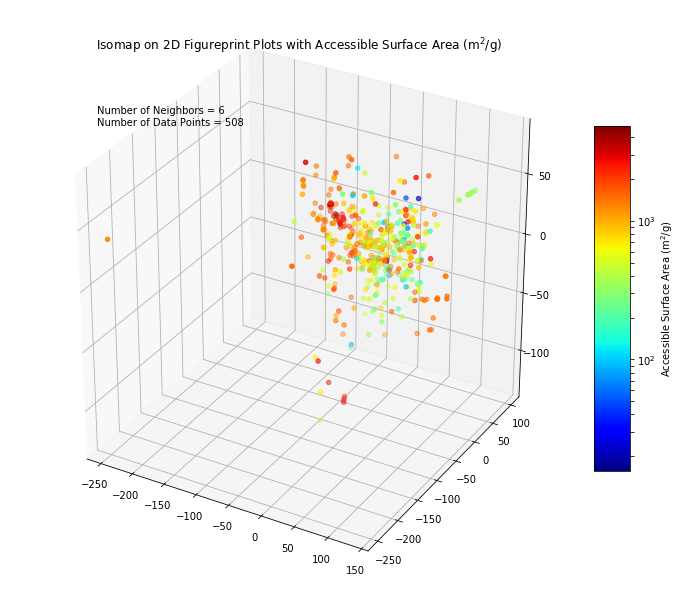

In [6]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
fig1 = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1 = fig1.add_axes([0,0,.8,1], projection='3d')
ax1cb = fig1.add_axes([.81,0.2,.05,.6])

# ax1.w_zaxis.line.set_lw(0.)
# ax1.w_zaxis.set_pane_color((1,1,1,0))
# # ax1.w_zaxis.grid(False)
# # ax1.set_zticks([])
# ax1.set_zticklabels([])
# for t in ax1.zaxis.get_major_ticks():
#     t.label.set_fontsize(10)
#     t.tick1line.set_alpha(0)
cpd_c = 0

ax1.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
ax1.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508', 
           transform=ax1.transAxes)
ax1.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/g)' ) 
cb1 = mpl.colorbar.ColorbarBase(ax1cb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1.set_label('Accessible Surface Area (m$^2$/g)')
# ax1.view_init(20,60)
# fig1.tight_layout()
# fig1.savefig('./figs_final/iso508_nb6_g', dpi=400, bbox_inches='tight')
# fig1.savefig('./figs_final/iso508_nb6_g.pdf', bbox_inches='tight')

In [7]:
# scpydist.squareform(scpydist.pdist(hist_2d, 'euclidean'))
dist_mat = scpydist.squareform(scpydist.pdist(hist_2d, 'euclidean'))

In [20]:
# manilern610 = manifold.Isomap(n_neighbors=6,n_components=10,
# #                               neighbors_algorithm='kd_tree',
#                              )
# # manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
# prj_unfld610 = manilern610.fit_transform(hist_2d)

manilern610 = Isomap2(n_neighbors=6,n_components=3,
#                       neighbors_algorithm='kd_tree',
                     )
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld = manilern610.fit_transform(dist_mat)
# prj_unfld = manilern610.fit_transform(scpydist.squareform(scpydist.pdist(hist_2d, )))

In [11]:
scpydist.squareform(scpydist.pdist(hist_2d,))

array([[ 0.        , 37.87320075, 44.49039176, ..., 37.74695121,
        36.69179539, 49.9676449 ],
       [37.87320075,  0.        , 54.06774697, ..., 40.84613077,
        40.72090597, 53.94297973],
       [44.49039176, 54.06774697,  0.        , ..., 57.0665312 ,
        55.96214325, 58.88169674],
       ...,
       [37.74695121, 40.84613077, 57.0665312 , ...,  0.        ,
        27.42093435, 57.11484336],
       [36.69179539, 40.72090597, 55.96214325, ..., 27.42093435,
         0.        , 56.63889299],
       [49.9676449 , 53.94297973, 58.88169674, ..., 57.11484336,
        56.63889299,  0.        ]])

In [12]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

## 3D scatter plot for all of the 508 MOF's, and movies

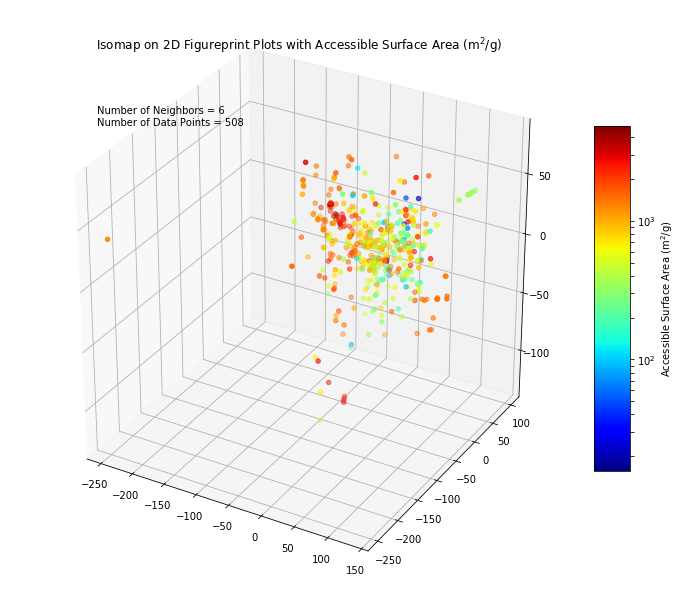

In [19]:
cpd_c = 0
clrr = []
chem_fml = []
for cpdn in cxs_list:
#     clrr.append(csd_mof.loc[cpdn][6])
    clrr.append(csd_mof.loc[cpdn][7])
    chem_fml.append(csd_mof.loc[cpdn][0])

clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
fig1 = plt.figure(figsize=(10,8))
# ax1 = fig1.add_subplot(111, projection='3d',)
ax1 = fig1.add_axes([0,0,.8,1], projection='3d')
ax1cb = fig1.add_axes([.81,0.2,.05,.6])

# ax1.w_zaxis.line.set_lw(0.)
# ax1.w_zaxis.set_pane_color((1,1,1,0))
# # ax1.w_zaxis.grid(False)
# # ax1.set_zticks([])
# ax1.set_zticklabels([])
# for t in ax1.zaxis.get_major_ticks():
#     t.label.set_fontsize(10)
#     t.tick1line.set_alpha(0)
cpd_c = 0

# ax1.scatter(*prj_unfld610.T[0:3], c=clrmp(clrnorm(clrr)))
# ax1.scatter(*prj_unfld.T[0:3], c=clrmp(clrnorm(clrr)))
ax1.scatter(prj_unfld.T[0], prj_unfld.T[1], -prj_unfld.T[2], c=clrmp(clrnorm(clrr)))
ax1.text2D(0.15, 0.8, 'Number of Neighbors = 6\nNumber of Data Points = 508', 
           transform=ax1.transAxes)
ax1.set_title('Isomap on 2D Figureprint Plots with Accessible Surface Area (m$^2$/g)' ) 
cb1 = mpl.colorbar.ColorbarBase(ax1cb, cmap=clrmp,
                                norm=clrnorm,
                                orientation='vertical')
cb1.set_label('Accessible Surface Area (m$^2$/g)')
# ax1.view_init(20,60)
fig1.tight_layout()
# fig1.savefig('./figs_final/iso508_nb6_g', dpi=400, bbox_inches='tight')
# fig1.savefig('./figs_final/iso508_nb6_g.pdf', bbox_inches='tight')

In [5]:
from sklearn.manifold.isomap2 import Isomap2
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as scpydist
from sklearn import neighbors
from scipy.sparse import csgraph

## End of Test Isomap2

## Subsetting, with the initial 57 in the subset. 
150, 250 and 350. All of the three cases will use 8 neighbors based on preliminary results

In [17]:
org57lbl = [xx for val in po_size_keep.values.tolist() for xx in val]
org57idx508 = [cxs_list.index(xx) for xx in org57lbl]
# cxs_list508wo57 = deepcopy(cxs_list)
cxs_list508wo57 = [xx for xx in cxs_list if xx not in org57lbl]
hist_2d_508wo57 = [hist_2d[ii] for ii in range(len(hist_2d)) if not ii in org57idx508]
# hist_2d_org57 = [hist_2d[ii] for ii in range(len(hist_2d)) if ii in org57idx508]
hist_2d_org57 = [hist_2d[ii] for ii in org57idx508]
# hist_2d_57 = [hist_2d_50857.pop(xx) for xx in org57idx508]
len(hist_2d_org57) + len(hist_2d_508wo57)

508

In [217]:
# cxs_list508wo57
# hist_2d_508wo57
# org57idx508
# hist_2d_org57

In [21]:
# len(hist_2d_50857)
# len(org57idx508)
# [hist_2d[ii] if ii in org57idx508 for ii in range(len(hist_2d)) ]
# [hist_2d[ii] if ii in org57idx508 else None for ii in range(len(hist_2d))]
[hist_2d[ii] for ii in range(len(hist_2d)) if not ii in org57idx508]\
== [hist_2d[ii] for ii in range(len(hist_2d)) if ii not in org57idx508]

True

In [18]:
n_bytes = 2**31
max_bytes = 2**31 - 1

In [121]:
# for num_sel in [150, 250, 350, 508]:
for num_sel in [150]:
    num_sel = num_sel - 57 # subtract the number of the original 57 MOF's
    out_dic = {}
    sel_idx = sorted(random.sample(range(len(cxs_list508wo57)), num_sel))
    sel_hist2d = [hist_2d_508wo57[ii] for ii in sel_idx]
    sel_hist2d = sel_hist2d + hist_2d_org57
    out_dic['sel_idx'] = sel_idx
    
    for nnb in [4, 6, 8]:
        manilern = manifold.Isomap(n_neighbors=nnb,n_components=10,neighbors_algorithm='kd_tree')
        prj_unfld = manilern.fit_transform(sel_hist2d)
#         prj_unfld1 = manilern.fit(sel_hist2d)
        out_dic['nnb'+str(nnb)] = deepcopy(manilern)
        
#     with open('./mani_mdls/mani_mdl'+str(num_sel)+'_'+str(nnb)+'.pkl', 'wb') as fp:
#         pickle.dump(out_dic, fp)

# Comment out below for saving files
#     file_path = './mani_mdls/mani_mdl57in'+str(num_sel+57)+'.pkl'
#     bytes_out = pickle.dumps(out_dic)
#     with open(file_path, 'wb') as f_out:
#         for idx in range(0, len(bytes_out), max_bytes):
#             f_out.write(bytes_out[idx:idx+max_bytes])
        

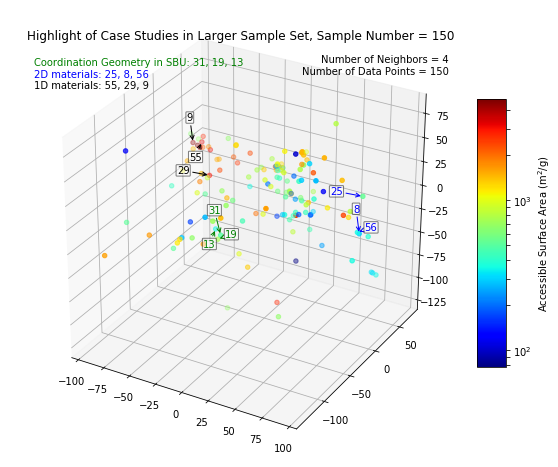

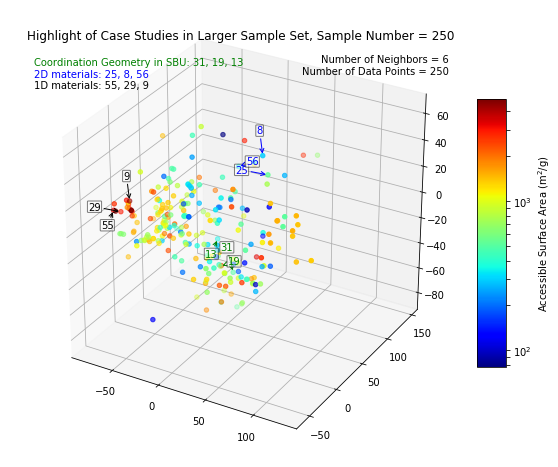

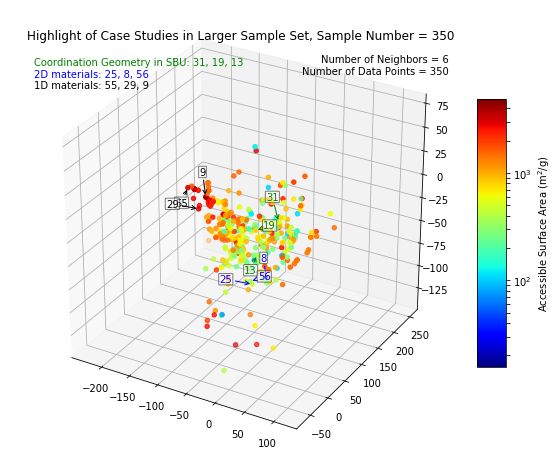

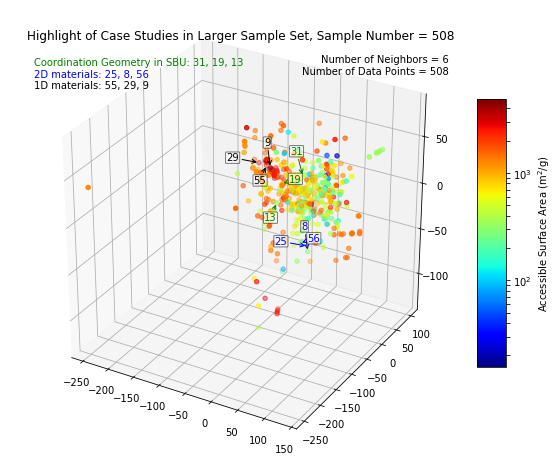

In [28]:
for num_sel, nbn in zip([150, 250, 350, 508], [4, 6, 6, 6]):
# for num_sel in [150,]:
    file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    data2 = pickle.loads(bytes_in)

    cpd_c = 0
    clrr = []
    chem_fml = []
    for cpdn in data2['sel_idx']:
    #     clrr.append(csd_mof.loc[cpdn][6])
        clrr.append(csd_mof.loc[cxs_list508wo57[cpdn]][7])
    #     chem_fml.append(csd_mof.loc[cpdn][0])
    for lbl in org57lbl:
        clrr.append(csd_mof.loc[lbl][7])
    clrmp = mpl.cm.get_cmap('jet')
    # clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
    clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
    # data2['nnb8']

    fig2 = plt.figure(figsize=(8,6.2))
    # ax4 = fig4.add_subplot(111,)
    # ax2 = fig2.add_axes([0,0,.8,1])
    ax2 = fig2.add_axes([0,0,.8,1], projection='3d')
    ax2cb = fig2.add_axes([.81,0.2,.05,.6])

    # ax2.scatter(*data2['nnb8'].embedding_.T[0:2], c=clrmp(clrnorm(clrr)))
    ax2.scatter(*data2['nnb'+str(nbn)].embedding_.T[0:3], c=clrmp(clrnorm(clrr)))

    # ax2.view_init(0)
    # text offset list
    xyoffsets = [[0,10], [-3, -3], [3, -3]]
    xyoffsets = [[0,10], [10, 0], [0, -10], [-10, 0]]
    xyoffset_ctr = 0

#     # lead compound 42
#     for lbl in [42]:
#         xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
#                                              ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
#                                              zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
#                                     M=ax2.get_proj())
#     #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
#         ax2.annotate( s=lbl, color='r',
#         xy = (xp2, yp2), 
#         xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='r')
#                     )
#         xyoffset_ctr += 1

    # Coordination Geometry in SBU, 31 19 13
    for lbl in [31, 19, 13]:
        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='g',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='g')
                    )
        xyoffset_ctr += 1

    # 2D material, 25 8 56
    for lbl in [25, 8, 56]:
        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='b',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='b')
                    )
        xyoffset_ctr += 1

    # 1D material, 55 29 9
    for lbl in [55, 29, 9]:
        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb'+str(nbn)].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='k',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='k')
                    )
        xyoffset_ctr += 1
#     ax2.text2D(0.05, 0.9, 'Lead Compound: 42', color='r', 
#                transform=ax2.transAxes)
    ax2.text2D(0.05, 0.875, 'Coordination Geometry in SBU: 31, 19, 13', color='g', 
               transform=ax2.transAxes)
    ax2.text2D(0.05, 0.85, '2D materials: 25, 8, 56', color='b', 
               transform=ax2.transAxes)
    ax2.text2D(0.05, 0.825, '1D materials: 55, 29, 9', color='k', 
               transform=ax2.transAxes)
    cb2 = mpl.colorbar.ColorbarBase(ax2cb, cmap=clrmp,
                                    norm=clrnorm,
                                    orientation='vertical')
    # ax2.view_init(0)
    ax2.text2D(0.95, 0.9, 'Number of Neighbors = '+str(nbn)+'\nNumber of Data Points = '+str(num_sel), 
           transform=ax2.transAxes, ha='right', va='top')
    ax2.set_title('Highlight of Case Studies in Larger Sample Set, Sample Number = '+str(num_sel))
    cb2.set_label('Accessible Surface Area (m$^2$/g)')
    fig2.tight_layout()
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'.pdf', bbox_inches='tight')
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel), dpi=400, bbox_inches='tight')
    fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'wolead.pdf', bbox_inches='tight')
    fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'wolead', dpi=400, bbox_inches='tight')

In [137]:
num_sel=150
file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
bytes_in = bytearray(0)
input_size = os.path.getsize(file_path)
with open(file_path, 'rb') as f_in:
    for _ in range(0, input_size, max_bytes):
        bytes_in += f_in.read(max_bytes)
data2 = pickle.loads(bytes_in)

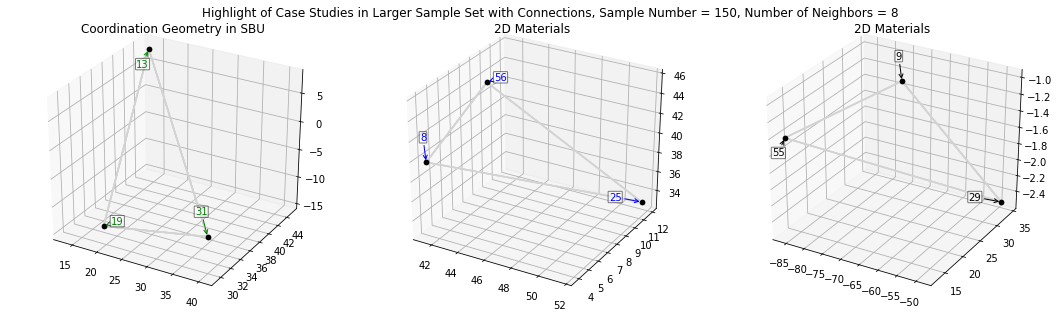

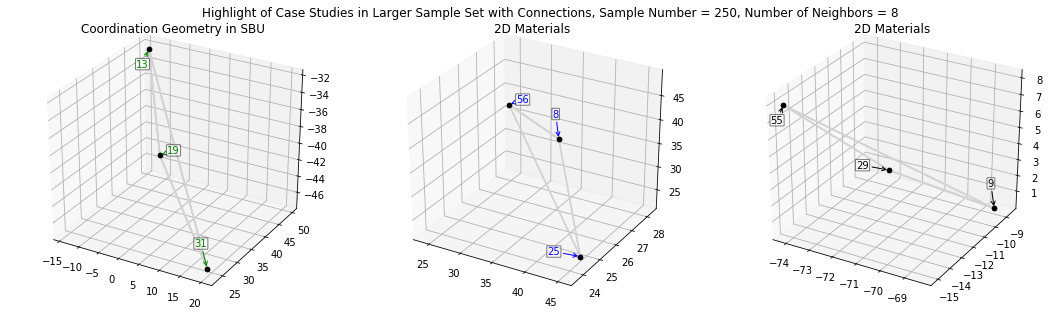

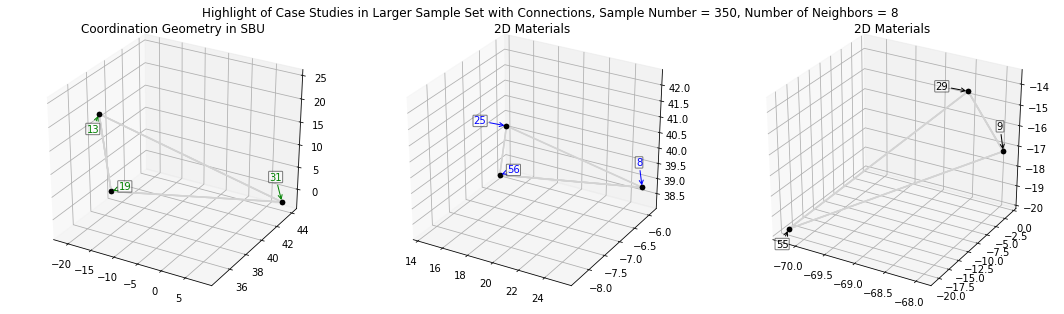

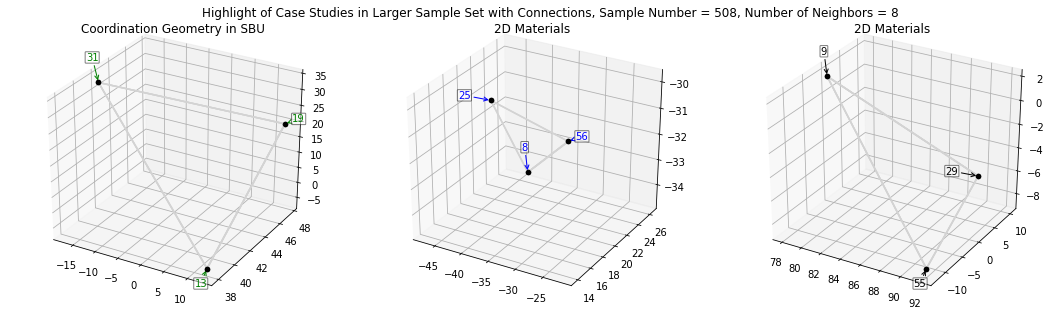

In [214]:
for num_sel in [150, 250, 350, 508]:
# for num_sel in [150,]:
    file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    data2 = pickle.loads(bytes_in)

    cpd_c = 0
    clrr = []
    chem_fml = []
    for cpdn in data2['sel_idx']:
    #     clrr.append(csd_mof.loc[cpdn][6])
        clrr.append(csd_mof.loc[cxs_list508wo57[cpdn]][7])
    #     chem_fml.append(csd_mof.loc[cpdn][0])
    for lbl in org57lbl:
        clrr.append(csd_mof.loc[lbl][7])
    clrmp = mpl.cm.get_cmap('jet')
    # clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
    clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
    # data2['nnb8']

    fig3 = plt.figure(figsize=(15,4))
    # ax4 = fig4.add_subplot(111,)
    # ax2 = fig2.add_axes([0,0,.8,1])
    ax31 = fig3.add_axes([0,0,.3,1], projection='3d')
    ax32 = fig3.add_axes([0.333,0,.3,1], projection='3d')
    ax33 = fig3.add_axes([0.666,0,.3,1], projection='3d')
    # ax3cb = fig3.add_axes([.81,0.2,.05,.6])

    # ax2.scatter(*data2['nnb8'].embedding_.T[0:2], c=clrmp(clrnorm(clrr)))
    # ax2.scatter(*data2['nnb8'].embedding_.T[0:3], c=clrmp(clrnorm(clrr)))

    # ax2.view_init(0)
    # text offset list
    xyoffsets = [[0,10], [-3, -3], [3, -3]]
    xyoffsets = [[0,10], [10, 0], [0, -10], [-10, 0]]
    xyoffset_ctr = 0

    # for lbl in [42, 25, 8, 56, 31, 19, 13, 55, 29, 9]:
    #     ax3.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
    #                 ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
    #                 zs=data2['nnb8'].embedding_[num_sel-57+lbl][2],
    #                 c = 'k',
    #                 zorder=1
    #                )
    # nbr_graph = data2['nnb8'].nbrs_.kneighbors_graph().todense()
    nbr_mtx = data2['nnb8'].nbrs_.kneighbors()[1]
    # lead compound 42
    # for lbl in [42]:
    # #     ax2.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
    # #                 ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
    # #                 zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], )
    #     xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
    #                                          ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
    #                                          zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
    #                                 M=ax2.get_proj())
    # #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
    #     ax3.annotate( s=lbl, color='r',
    #     xy = (xp2, yp2), 
    #     xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
    #     textcoords = 'offset points', ha = 'right', va = 'bottom',
    #     bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
    #     arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='r')
    #                 )
    #     xyoffset_ctr += 1

    # Coordination Geometry in SBU, 31 19 13
    subnet_idx = [31, 19, 13]
    for lbl in [31, 19, 13]:
        ax31.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                    ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                    zs=data2['nnb8'].embedding_[num_sel-57+lbl][2],
                    c = 'k',
                    zorder=1)
        for conn_org in subnet_idx:
            for conn_nbr in \
            nbr_mtx[num_sel- 57 + conn_org][nbr_mtx[num_sel- 57 + conn_org] >= (num_sel-57)] - (num_sel-57):
                if conn_nbr in subnet_idx:
                    ax31.plot([data2['nnb8'].embedding_[num_sel-57+lbl][0], data2['nnb8'].embedding_[num_sel-57+conn_nbr][0]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][1], data2['nnb8'].embedding_[num_sel-57+conn_nbr][1]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][2], data2['nnb8'].embedding_[num_sel-57+conn_nbr][2]],
                             c='lightgrey', alpha=1,
                        zorder=0)
        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                                    M=ax31.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax31.annotate( s=lbl, color='g',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='g')
                    )
        xyoffset_ctr += 1
        ax31.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                zs=data2['nnb8'].embedding_[num_sel-57+lbl][2],
                c = 'k',
                zorder=1)
    ax31.set_title('Coordination Geometry in SBU')

    # 2D material, 25 8 56
    subnet_idx = [25, 8, 56]
    for lbl in [25, 8, 56]:
        ax32.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                    ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                    zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                    c = 'k',
                    zorder =1)
        for conn_org in subnet_idx:
            for conn_nbr in \
            nbr_mtx[num_sel- 57 + conn_org][nbr_mtx[num_sel- 57 + conn_org] >= (num_sel-57)] - (num_sel-57):
                if conn_nbr in subnet_idx:
                    ax32.plot([data2['nnb8'].embedding_[num_sel-57+lbl][0], data2['nnb8'].embedding_[num_sel-57+conn_nbr][0]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][1], data2['nnb8'].embedding_[num_sel-57+conn_nbr][1]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][2], data2['nnb8'].embedding_[num_sel-57+conn_nbr][2]],
                             c='lightgrey', alpha=1,
                        zorder=0)
        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                                    M=ax32.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax32.annotate( s=lbl, color='b',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='b')
                    )
        xyoffset_ctr += 1
        ax32.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                c = 'k',
                zorder =1)
    ax32.set_title('2D Materials')

    # 1D material, 55 29 9
    subnet_idx = [55, 29, 9]
    for lbl in [55, 29, 9]:
    #     ax2.scatter(*data2['nnb8'].embedding_.T[0:3], c=clrmp(clrnorm(clrr)))
        ax33.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                    ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                    zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                    c = 'k',
                    zorder = 1)
        for conn_org in subnet_idx:
            for conn_nbr in \
            nbr_mtx[num_sel- 57 + conn_org][nbr_mtx[num_sel- 57 + conn_org] >= (num_sel-57)] - (num_sel-57):
                if conn_nbr in subnet_idx:
                    ax33.plot([data2['nnb8'].embedding_[num_sel-57+lbl][0], data2['nnb8'].embedding_[num_sel-57+conn_nbr][0]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][1], data2['nnb8'].embedding_[num_sel-57+conn_nbr][1]],
                             [data2['nnb8'].embedding_[num_sel-57+lbl][2], data2['nnb8'].embedding_[num_sel-57+conn_nbr][2]],
                             c='lightgrey', alpha=1,
                        zorder=0)

        xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                                             ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                                             zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                                    M=ax33.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax33.annotate( s=lbl, color='k',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='k')
                    )
        xyoffset_ctr += 1
        ax33.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
                    ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
                    zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
                    c = 'k',
                    zorder = 1)
    ax33.set_title('2D Materials')

    # Re-plot the scatter points, otherwise may have z-order issue
    # for lbl in [42, 25, 8, 56, 31, 19, 13, 55, 29, 9]:
    #     ax3.scatter(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
    #                 ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
    #                 zs=data2['nnb8'].embedding_[num_sel-57+lbl][2],
    #                 c = 'k',
    #                 zorder=1
    #                )
    #     ax2.text2D(0.05, 0.9, 'Lead Compound: 42', color='r', 
    #                transform=ax2.transAxes)
    # ax3.text2D(0.05, 0.875, 'Coordination Geometry in SBU: 31, 19, 13', color='g', 
    #            transform=ax2.transAxes)
    # ax3.text2D(0.05, 0.85, '2D materials: 25, 8, 56', color='b', 
    #            transform=ax2.transAxes)
    # ax3.text2D(0.05, 0.825, '1D materials: 55, 29, 9', color='k', 
    #            transform=ax2.transAxes)
    # cb3 = mpl.colorbar.ColorbarBase(ax3cb, cmap=clrmp,
    #                                 norm=clrnorm,
    #                                 orientation='vertical')
    # ax2.view_init(0)
    # ax3.text2D(0.95, 0.9, 'Number of Neighbors = 8\nNumber of Data Points = '+str(num_sel), 
    #        transform=ax2.transAxes, ha='right', va='top')
    fig3.suptitle('Highlight of Case Studies in Larger Sample Set with Connections, Sample Number = '+str(num_sel)\
                 +', Number of Neighbors = 8',
                 y=1.03)
    # cb3.set_label('Accessible Surface Area (m$^2$/g)')
    fig3.tight_layout()
#     fig3.savefig('./figs_final/case_stdconn'+str(num_sel), bbox_inches='tight', dpi =400)
    fig3.savefig('./figs_final/case_stdconn'+str(num_sel)+'.pdf', bbox_inches='tight')

In [211]:
fig3.savefig('./test_nbr', dpi=300, bbox_inches='tight')

In [169]:
# data2['sel_idx']
# np.ones(2

mnlmdl = data2['nnb8']
mnlmdl.nbrs_.kneighbors_graph().todense()
nbr_mtx = mnlmdl.nbrs_.kneighbors()[1]

In [239]:
nbr_mtx[num_sel- 57 + 55][nbr_mtx[num_sel- 57 + 55] >= (num_sel-57)] - (num_sel-57)
# data2['nnb8'].embedding_[num_sel-57+lbl]

array([29,  9, 36])

In [226]:
manilern = manifold.Isomap(n_neighbors=2,n_components=10,neighbors_algorithm='kd_tree')
# manilern = manifold.Isomap(n_neighbors=3,n_components=2,neighbors_algorithm='kd_tree')
prj_unfld = manilern.fit_transform(hist_2d_org57)

In [227]:
clrr = []
chem_fml = []
# for cpdn in org57lbl:
#     clrr.append(csd_mof.loc[cpdn][6])
#     clrr.append(csd_mof.loc[cxs_list508wo57[cpdn]][7])
#     chem_fml.append(csd_mof.loc[cpdn][0])
for lbl in org57lbl:
    clrr.append(csd_mof.loc[lbl][7])
clrmp = mpl.cm.get_cmap('jet')
# clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

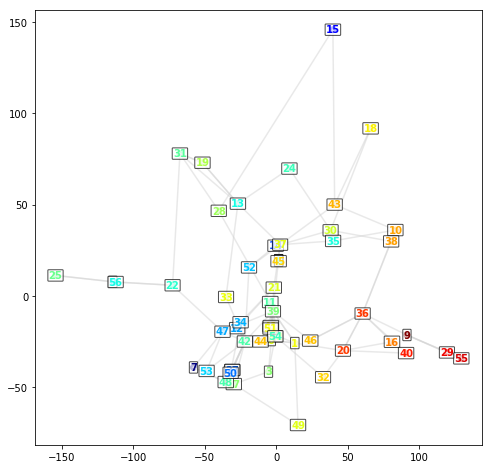

In [237]:
fig6 = plt.figure(figsize=(8,8))
ax6 = fig6.add_subplot(111)
ax6.scatter(*prj_unfld.T[0:2], c=clrmp(clrnorm(clrr)))
for xxyy, conn in zip(prj_unfld, manilern.nbrs_.kneighbors()[1] ):
        for tgt_nd in conn:
            ax6.plot([xxyy[0], prj_unfld[tgt_nd][0]],[xxyy[1], prj_unfld[tgt_nd][1]], c='lightgrey', alpha=.5)
cpd_c = 0
for xxyy, conn in zip(prj_unfld, manilern.nbrs_.kneighbors()[1] ):
#     ax4.scatter(prj_unfld[cpd_c][0], prj_unfld[cpd_c][1],
#                c=clrmp(clrnorm(clrr[cpd_c])), 
#                 label=str(cpd_c)+' :'+chem_fml[cpd_c],
#                marker=''
#                 , s=0)
    ax6.text(x=xxyy[0], y=xxyy[1], s=cpd_c, 
#              transform=ax3.transData,
            color=clrmp(clrnorm(clrr[cpd_c])),
#              color='b',
             bbox=dict(boxstyle='round', fc='white', alpha=.7, pad=0.07),
             fontsize=10,
             weight='bold',
            va='center', ha='center',
            )
    cpd_c+=1 

In [238]:
fig6.savefig('./test57.pdf')

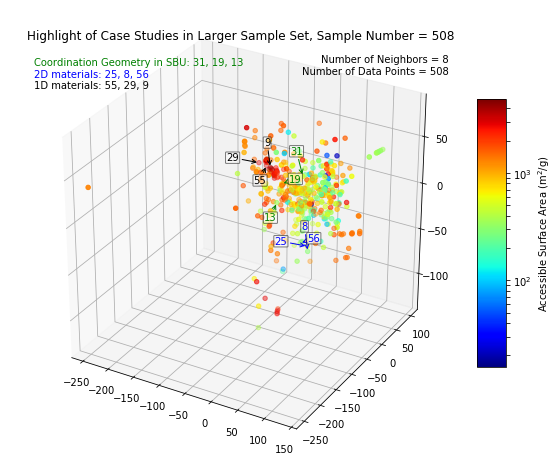

In [23]:
nbn = 'nnb6'
# for num_sel in [150, 250, 350, 508]:
for num_sel in [508,]:
    file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    data2 = pickle.loads(bytes_in)

    cpd_c = 0
    clrr = []
    chem_fml = []
    for cpdn in data2['sel_idx']:
    #     clrr.append(csd_mof.loc[cpdn][6])
        clrr.append(csd_mof.loc[cxs_list508wo57[cpdn]][7])
    #     chem_fml.append(csd_mof.loc[cpdn][0])
    for lbl in org57lbl:
        clrr.append(csd_mof.loc[lbl][7])
    clrmp = mpl.cm.get_cmap('jet')
    # clrnorm = mpl.colors.Normalize(min(clrr), max(clrr))
    clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))
    # data2['nnb8']

    fig2 = plt.figure(figsize=(8,6.2))
    # ax4 = fig4.add_subplot(111,)
    # ax2 = fig2.add_axes([0,0,.8,1])
    ax2 = fig2.add_axes([0,0,.8,1], projection='3d')
    ax2cb = fig2.add_axes([.81,0.2,.05,.6])

    # ax2.scatter(*data2['nnb8'].embedding_.T[0:2], c=clrmp(clrnorm(clrr)))
#     ax2.scatter(*data2['nnb8'].embedding_.T[0:3], c=clrmp(clrnorm(clrr)))
    ax2.scatter(*data2[nbn].embedding_.T[0:3], c=clrmp(clrnorm(clrr)))
#     ax2.view_init(20, 60)

    # Troubleshooting
#     ax2.set_xlim(22, 47)
#     ax2.set_ylim(23, 29)
#     ax2.set_zlim(20, 50)
    
    # ax2.view_init(0)
    # text offset list
    xyoffsets = [[0,10], [-3, -3], [3, -3]]
    xyoffsets = [[0,10], [10, 0], [0, -10], [-10, 0]]
    xyoffset_ctr = 0

#     # lead compound 42
#     for lbl in [42]:
#         xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
#                                              ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
#                                              zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
#                                     M=ax2.get_proj())
#     #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
#         ax2.annotate( s=lbl, color='r',
#         xy = (xp2, yp2), 
#         xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
#         textcoords = 'offset points', ha = 'right', va = 'bottom',
#         bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
#         arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='r')
#                     )
#         xyoffset_ctr += 1

    # Coordination Geometry in SBU, 31 19 13
    for lbl in [31, 19, 13]:
#         xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
#                                              ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
#                                              zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
#                                     M=ax2.get_proj())
        xp2, yp2, _ = proj3d.proj_transform(xs=data2[nbn].embedding_[num_sel-57+lbl][0], 
                                             ys=data2[nbn].embedding_[num_sel-57+lbl][1], 
                                             zs=data2[nbn].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='g',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='g')
                    )
        xyoffset_ctr += 1

    # 2D material, 25 8 56
    for lbl in [25, 8, 56]:
#         xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
#                                              ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
#                                              zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
#                                     M=ax2.get_proj())
        xp2, yp2, _ = proj3d.proj_transform(xs=data2[nbn].embedding_[num_sel-57+lbl][0], 
                                             ys=data2[nbn].embedding_[num_sel-57+lbl][1], 
                                             zs=data2[nbn].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='b',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='b')
                    )
        xyoffset_ctr += 1

    # 1D material, 55 29 9
    for lbl in [55, 29, 9]:
#         xp2, yp2, _ = proj3d.proj_transform(xs=data2['nnb8'].embedding_[num_sel-57+lbl][0], 
#                                              ys=data2['nnb8'].embedding_[num_sel-57+lbl][1], 
#                                              zs=data2['nnb8'].embedding_[num_sel-57+lbl][2], 
#                                     M=ax2.get_proj())
        xp2, yp2, _ = proj3d.proj_transform(xs=data2[nbn].embedding_[num_sel-57+lbl][0], 
                                             ys=data2[nbn].embedding_[num_sel-57+lbl][1], 
                                             zs=data2[nbn].embedding_[num_sel-57+lbl][2], 
                                    M=ax2.get_proj())
    #     xp2, yp2 = ax2.transData.inverted().transform(ax2.transData.transform((xp2, yp2)))
        ax2.annotate( s=lbl, color='k',
        xy = (xp2, yp2), 
        xytext = (xyoffsets[xyoffset_ctr%4][0]*2, xyoffsets[xyoffset_ctr%4][1]*2),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.07', fc = 'white', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='k')
                    )
        xyoffset_ctr += 1
#     ax2.text2D(0.05, 0.9, 'Lead Compound: 42', color='r', 
#                transform=ax2.transAxes)
    ax2.text2D(0.05, 0.875, 'Coordination Geometry in SBU: 31, 19, 13', color='g', 
               transform=ax2.transAxes)
    ax2.text2D(0.05, 0.85, '2D materials: 25, 8, 56', color='b', 
               transform=ax2.transAxes)
    ax2.text2D(0.05, 0.825, '1D materials: 55, 29, 9', color='k', 
               transform=ax2.transAxes)
    cb2 = mpl.colorbar.ColorbarBase(ax2cb, cmap=clrmp,
                                    norm=clrnorm,
                                    orientation='vertical')
    # ax2.view_init(0)
    ax2.text2D(0.95, 0.9, 'Number of Neighbors = 8\nNumber of Data Points = '+str(num_sel), 
           transform=ax2.transAxes, ha='right', va='top')
    ax2.set_title('Highlight of Case Studies in Larger Sample Set, Sample Number = '+str(num_sel))
    cb2.set_label('Accessible Surface Area (m$^2$/g)')
    fig2.tight_layout()
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'.pdf', bbox_inches='tight')
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel), dpi=400, bbox_inches='tight')
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'wolead.pdf', bbox_inches='tight')
#     fig2.savefig('./figs_final/hilite57in'+str(num_sel)+'wolead', dpi=400, bbox_inches='tight')
#     ax2.set_xlim(24, 28)
#     ax2.set_aspect('equal')

In [75]:
# cxs_list
csd_mof508 = csd_mof.loc[cxs_list].copy(deep=True)
idx_in_org57 = [org57lbl.index(cmpd_t) if cmpd_t in org57lbl else 'N/A' for cmpd_t in cxs_list ]
csd_mof508['index_in_orignal_57'] = idx_in_org57

In [66]:
csd_mof508

Formula  \
CSD refcode                               
IBICIH         (C11 H19 Cl1 N2 O4 Zn1)n   
LUDLAZ                C9.5 H4.5 Cu4 O10   
PAMTIH             (C9 H19 B1 Cd1 O12)n   
OPEGUM                  (C4 In1 O8 1-)n   
HAFVUH               (C16 H10 Mg2 O10)n   
KOSKIO                  (C8 H2 Co2 O6)n   
LETDEU             (C8 H8 Br1 Cu6 N12)n   
MOPFOO               (C8 H6 N6 O4 Zn2)n   
DOLFIV         (C12 H18 Cu2 N1 O13 1-)n   
LAGVAS           (C9 H17 Cu2 I2 N5 O1)n   
PYDCUO01              (C7 H5 N1 O7 U1)n   
PIHREF          (C14 H20 N5 O6 P1 Zn1)n   
UDOVUG               (C7 H9 O7 P1 Zn1)n   
SUGWEX01           (C20 H14 Cu1 N4 O4)n   
DOQQOR           (C11 H6 Br4 N2 O5 U1)n   
WOQTUT                (C11 H14 Fe2 O9)n   
FAQBOO         (C32 Cr1 Mn1 O12 P1 1-)n   
CUIMDZ01                (C6 H6 Cu1 N4)n   
OJANIW           (C4 H4 Cl1 Hg1 N2 O4)n   
PUTYAE          (C13 H9 Ag1 Cl1 N7 O6)n   
RAZCAX           (C12 H8 Ag1 F3 N2 O2)n   
IWELOM             (C10 H10 Co3 N8 O6)n   
XESKOX           (C6 H12 Mn2 N2 O6 P2)n   
EHALOP                 (C27 H5 Al1 O5)n   
POKBOH01     (C13 H15 Ag1 F6 N3 O2 P1)n   
QEQTOV          (C8 H18 B1 Cd1 N3 O13)n   
MINVOU01               (C26 H5 Cr1 O5)n   
WOTSEF         (C16 H15 Cd1 Cl6 N5 O3)n   
MINVOU                 (C21 H5 Cr1 O5)n   
BEPNUH          (C9 H15 Br1 N2 O4 Zn1)n   
...                                 ...   
KUNTAQ01             (C8 H4 Al1 F1 O4)n   
OWIVAS             (C18 H6 O12 Zn2 2-)n   
ZUMWUZ                      C25 N19 Sn7   
MADVUJ          (C18 H19 Cu1 I1 N1 S2)n   
FUSMEM          (C17 H16 Ag1 F3 N2 O4)n   
OWIVEW            (C18 Cl6 Mn2 O12 2-)n   
XOZXOA                  C12 H6 O20 Zn10   
IXODUV                 (C14 H12 O5 V1)n   
TUDJOS                 (C8 H10 N4 Zn1)n   
DOQQIL           (C11 H6 Cl4 N2 O5 U1)n   
EZIMAC              (C15 H7 Cu1 N1 O4)n   
PEKZIP         (C20 H16 Cl2 Cu2 N4 O4)n   
CELZUQ               (C16 H10 Al2 O10)n   
IWUYOO             (C21 H19 Cu1 N3 O5)n   
VEVJUD            (C7 H5 Cu2 I1 N4 S1)n   
UMUYIL         (C11 H10 Cl2 Cu1 N2 S2)n   
VIXBEK           (C10 H8 Cu2 I2 N2 S3)n   
IBUDOZ                 (C12 H4 Cu1 N5)n   
MUZHUL              (C10 H5 O9 Zn1 1-)n   
VISCAB              (C8 H14 Cu1 N3 O6)n   
WUHLAO               (C4 H4 N2 O3 Zn1)n   
FUGBOY                       Cl4 N2 Pb3   
ZIVDIT                  (C6 H4 Cu1 N5)n   
ULUVUT             (C5 H11 N11 O1 Zn1)n   
FIPWUY              (C9 H12 N4 O3 Zn1)n   
FIRPOM              (C12 H8 N2 O6 Pb1)n   
WEMYES01            (C3 H10 O8 P2 Zr1)n   
IXAJUN              (C13 H7 Cu1 N1 O4)n   
SOWCOY01            (C10 H5 N3 O4 Zn1)n   
DEGJEG                  (C6 H4 Cu1 N5)n   

                                                 Chemical_name  #Atom  \
CSD refcode                                                             
IBICIH       catena-((Î¼3-3-Methyl-2-(pyridin-4-ylmethylami...   42.0   
LUDLAZ       catena-[(Î¼4-5-(oxy(methoxy)methyl)isophthalat...   30.0   
PAMTIH       catena-((Î¼2-Lactato)-triaqua-cadmium(ii) dila...   45.0   
OPEGUM       catena-(tris(ethylenediamine)-cobalt bis(Î¼2-o...   19.0   
HAFVUH       catena-((Î¼8-biphenyl-3,3',5,5'-tetracarboxyla...   53.0   
KOSKIO        catena-[(Î¼-4,6-dioxyidoisophthalato)-di-cobalt]   34.0   
LETDEU       catena-(tetrakis(Î¼3-1,2,4-triazolato)-hexa-co...   41.0   
MOPFOO       catena-[(Î¼-but-2-enedioato)-bis(Î¼-triazolato...   34.0   
DOLFIV       catena-[bis(diisopropylammonium) tris(oxalato)...   52.0   
LAGVAS       catena-(bis(Î¼3-iodo)-(Î¼2-1-methyl-1H-1,2,4-t...   42.0   
PYDCUO01     catena-((Î¼2-Pyridine-2,6-dicarboxylato)-aqua-...   23.0   
PIHREF       catena-[(Î¼3-N,N'-dipyridin-4-ylphosphorodiami...   51.0   
UDOVUG       catena-(Oxonium (Î¼4-3-phosphonatobenzoato)-zi...   31.0   
SUGWEX01     catena-(bis(Î¼2-4-(1H-Imidazol-1-yl)benzoato)-...   48.0   
DOQQOR       catena-(3,5-dibromopyridinium (Î¼-3,5-dibromoi...   34.0   
WOQTUT       catena-((Î¼8-2,5-Dioxyterephthalato)-bis(metha...   50.0   
FAQBOO  

In [35]:

with open('./cxs_idx_subset_50.pkl', 'rb') as fp:
    sel_idx50 = pickle.load(fp)
    
with open('./cxs_idx_subset_100.pkl', 'rb') as fp:
    sel_idx100 = pickle.load(fp)

In [38]:
col_name = ['Iteration '+str(ii) for ii in range(1,11)]
# pd.DataFrame(data = sel_idx50.T, columns=col_name)

In [140]:
idx_list508 = csd_mof508.index.tolist()
col_name = ['Iteration '+str(ii) for ii in range(1,11)]
exlwriter = pd.ExcelWriter('Supp_data.xlsx')
csd_mof508.to_excel(exlwriter, sheet_name='508 MOF Structures')
for sample_num in [50, 150, 250, 350]:
    with open('./cxs_idx_subset_'+str(sample_num)+'.pkl', 'rb') as fp:
        sel_idx = pickle.load(fp)
    pd.DataFrame(data=sel_idx.T, columns=col_name)\
    .to_excel(exlwriter, sheet_name='Selected_Random_Indices'+str(sample_num))
    
# for num_sel, nbn in zip([150, 250, 350], [4, 6, 6]):
# # for num_sel in [150,]:
#     file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
#     bytes_in = bytearray(0)
#     input_size = os.path.getsize(file_path)
#     with open(file_path, 'rb') as f_in:
#         for _ in range(0, input_size, max_bytes):
#             bytes_in += f_in.read(max_bytes)
#     data2 = pickle.loads(bytes_in)
    
#     subset_case_idx = []
#     for cpdn in data2['sel_idx']:
#         subset_case_idx.append(idx_list508.index(cxs_list508wo57[cpdn]))
#     for lbl in org57lbl:
#         subset_case_idx.append(idx_list508.index(lbl))
#     pd.DataFrame(data=subset_case_idx, columns=['Selected Indices'])\
#     .to_excel(exlwriter, sheet_name='Selected_Random_Indices_case_study'+str(num_sel))
    
exlwriter.save()

In [110]:
# len(data2['sel_idx'])
# org57idx508[4] in 
# data2
# cxs_list508wo57

idx_list508 = csd_mof508.index.tolist()
subset_case_idx = []
for cpdn in data2['sel_idx']:
#     subset_case_idx.append(csd_mof.loc[cxs_list508wo57[cpdn]][7])
    subset_case_idx.append(idx_list508.index(cxs_list508wo57[cpdn]))
#     chem_fml.append(csd_mof.loc[cpdn][0])
for lbl in org57lbl:
    subset_case_idx.append(idx_list508.index(lbl))

In [137]:
exlwriter = pd.ExcelWriter('Supp_data_case.xlsx')
with open('./case_idx.dat', 'wb') as fp:
    
    for num_sel, nbn in zip([150, 250, 350], [4, 6, 6]):
    # for num_sel in [150,]:
        file_path = './mani_mdls/mani_mdl57in'+str(num_sel)+'.pkl'
        bytes_in = bytearray(0)
        input_size = os.path.getsize(file_path)
        with open(file_path, 'rb') as f_in:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f_in.read(max_bytes)
        data2 = pickle.loads(bytes_in)

        subset_case_idx = []
        for cpdn in data2['sel_idx']:
            subset_case_idx.append(idx_list508.index(cxs_list508wo57[cpdn]))
        for lbl in org57lbl:
            subset_case_idx.append(idx_list508.index(lbl))
#         pd.DataFrame(data=subset_case_idx, columns=['Selected Indices'])\
#         .to_excel(exlwriter, sheet_name='Selected_Random_Indices_case_study'+str(num_sel))
        for itm in sorted(subset_case_idx):
#             fp.write('%s ' % bytearray(itm))
            fp.write(bytearray(str(itm)+' ', encoding='utf-8'))
        fp.write(bytearray('\n', encoding='utf-8'))

# exlwriter.save()

## Check number of connected components of the graph networks in the Isomap, Oct 6, 2018

In [7]:
from sklearn import neighbors
from scipy.sparse import csgraph

In [8]:
lbls = [[50, 100, 150, 250, 350], [2, 4, 6, 8]]
dt = pd.DataFrame(index=pd.MultiIndex.from_product(lbls, names=['Sample_Num', 'N_neighbor']),
            columns=range(1,11))
for setnum in [50, 100, 150, 250, 350]:
    rand_idx = pd.read_excel('rand_idx.xlsx',sheet_name='set'+str(setnum))
    for expnum in range(1,11):
        mofset = []
        for mofid in rand_idx['#'+str(expnum)].values.tolist():
            mofset.append(hist_2d[mofid])
        for N_k in [2, 4, 6, 8]:
            adj = neighbors.kneighbors_graph(np.array(mofset), N_k)
#             n_components, labels = csgraph.connected_components(adj)
            n_components, labels = csgraph.connected_components(adj, directed=False)
            dt.loc[(setnum, N_k),expnum] = n_components
            print('set: '+str(setnum)+', exp: '+str(expnum)+', N_nbr: '+str(N_k)+', Ncomp='+str(n_components))

writer = pd.ExcelWriter('subset_N_comp_undirected'+'.xlsx')
dt.to_excel(writer)
writer.save()

set: 50, exp: 1, N_nbr: 2, Ncomp=1
set: 50, exp: 1, N_nbr: 4, Ncomp=1
set: 50, exp: 1, N_nbr: 6, Ncomp=1
set: 50, exp: 1, N_nbr: 8, Ncomp=1
set: 50, exp: 2, N_nbr: 2, Ncomp=1
set: 50, exp: 2, N_nbr: 4, Ncomp=1
set: 50, exp: 2, N_nbr: 6, Ncomp=1
set: 50, exp: 2, N_nbr: 8, Ncomp=1
set: 50, exp: 3, N_nbr: 2, Ncomp=1
set: 50, exp: 3, N_nbr: 4, Ncomp=1
set: 50, exp: 3, N_nbr: 6, Ncomp=1
set: 50, exp: 3, N_nbr: 8, Ncomp=1
set: 50, exp: 4, N_nbr: 2, Ncomp=1
set: 50, exp: 4, N_nbr: 4, Ncomp=1
set: 50, exp: 4, N_nbr: 6, Ncomp=1
set: 50, exp: 4, N_nbr: 8, Ncomp=1
set: 50, exp: 5, N_nbr: 2, Ncomp=1
set: 50, exp: 5, N_nbr: 4, Ncomp=1
set: 50, exp: 5, N_nbr: 6, Ncomp=1
set: 50, exp: 5, N_nbr: 8, Ncomp=1
set: 50, exp: 6, N_nbr: 2, Ncomp=1
set: 50, exp: 6, N_nbr: 4, Ncomp=1
set: 50, exp: 6, N_nbr: 6, Ncomp=1
set: 50, exp: 6, N_nbr: 8, Ncomp=1
set: 50, exp: 7, N_nbr: 2, Ncomp=1
set: 50, exp: 7, N_nbr: 4, Ncomp=1
set: 50, exp: 7, N_nbr: 6, Ncomp=1
set: 50, exp: 7, N_nbr: 8, Ncomp=1
set: 50, exp: 8, N_n

In [15]:
for setnum in [150, 250, 350]:
    rand_idx = pd.read_excel('rand_idx.xlsx',sheet_name='case'+str(setnum))
#     for expnum in range(1,11):
    mofset = []
    for mofid in rand_idx['case_'+str(setnum)].values.tolist():
        mofset.append(hist_2d[mofid])
    for N_k in [4, 6, 8]:
        adj = neighbors.kneighbors_graph(np.array(mofset), N_k)
        n_components, labels = csgraph.connected_components(adj, directed=False)
        print('set: '+str(setnum)+', N_nbr: '+str(N_k)+', Ncomp='+str(n_components))
            

set: 150, N_nbr: 4, Ncomp=1
set: 150, N_nbr: 6, Ncomp=1
set: 150, N_nbr: 8, Ncomp=1
set: 250, N_nbr: 4, Ncomp=1
set: 250, N_nbr: 6, Ncomp=1
set: 250, N_nbr: 8, Ncomp=1
set: 350, N_nbr: 4, Ncomp=2
set: 350, N_nbr: 6, Ncomp=1
set: 350, N_nbr: 8, Ncomp=1


In [13]:
adj = neighbors.kneighbors_graph(np.array(hist_2d), 6)
n_components, labels = csgraph.connected_components(adj, directed=False)

In [9]:
# n_components
dt

1   2   3   4   5   6   7   8   9   10
Sample_Num N_neighbor                                        
50         2            1   1   1   1   1   1   1   2   1   1
           4            1   1   1   1   1   1   1   1   1   1
           6            1   1   1   1   1   1   1   1   1   1
           8            1   1   1   1   1   1   1   1   1   1
100        2            2   2   1   1   3   1   1   1   2   1
           4            1   1   1   1   2   1   1   1   1   1
           6            1   1   1   1   1   1   1   1   1   1
           8            1   1   1   1   1   1   1   1   1   1
150        2            3   2   3   1   3   4   3   1   3   3
           4            1   1   1   1   1   1   1   1   1   1
           6            1   1   1   1   1   1   1   1   1   1
           8            1   1   1   1   1   1   1   1   1   1
250        2            3   3   2   4   5   4   3   5   3   5
           4            1   1   1   2   2   2   1   1   2   2
           6            1   1   1   1   1   1   1   1   1   1
           8            1   1   1   1   1   1   1   1   1   1
350        2            5   3   3   4   6   5   4   5   5   7
           4            2   1   2   2   1   2   2   1   1   3
           6            1   1   1   1   1   1   1   1   1   1
           8            1   1   1   1   1   1   1   1   1   1